In [1]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import gmaps
import os
from pprint import pprint
from scipy.stats import linregress
from scipy import stats
import seaborn as sb
from sklearn import preprocessing
from mlxtend.preprocessing import standardize

In [2]:
# The path to CSV files
find_path1 = "Resources/summary_table_road_traffic_deaths.csv"
find_path2 = "Resources/Table_A7_Seat-belt.csv"
find_path3 = "Resources/Table_A8_Child_restraint.csv"

# Read data into pandas
df1 = pd.read_csv(find_path1)
df2 = pd.read_csv(find_path2)
df3 = pd.read_csv(find_path3)

In [3]:
# Merge the main DataFrame and Seat-belt DataFrame based on the Countries they share
df4=pd.merge(df1,df2, how='left', on='Country/Area')

In [4]:
# Merge the previous merged DataFrame and child restraint DataFrame based on the Countries they share
df=pd.merge(df4,df3, how='left', on='Country/Area')

In [5]:
# Rename columns so that they are differentiated
df.rename(columns= {"Country/Area":"country","Population numbers for 2016a":"population","Income levelc":"income","Reported number of road traffic deaths":"number of deaths","National seat\nbelt law":"seat belt law","National child restraint law":"child restraint law","Seat belt applies to Drivers":"seat belt drivers","Seat belt applies to Front seat passengers":"seat belt front seat",
                   "Seat belt applies to Rear-seat passengers":"seat belt rear seat","Seat-belt wearing rates (%) Drivers only ":"rates seat belt drivers"," Seat-belt wearing rates (%) Front-seat occupants":"rates seat belt front seat","Seat-belt wearing rates (%) Rear-seat occupants":"rates seat belt rear seat","Seat-belt wearing rates (%) All occupants":"rates seat belt all"
                   ,"\nChild restraints required ":"child restraints","Children seated \nin front seat":"child seatedcin front","Standard referred to and/or specified":"standard specified","Percentage of children using child restraints":"percentage child restraints"}, inplace=True)

In [6]:
# Collecting columns which will be used in analyzation
df = df[["country","population","income","number of deaths","seat belt law","seat belt drivers",
        "seat belt front seat","seat belt rear seat","rates seat belt drivers","rates seat belt front seat",
        "rates seat belt rear seat","rates seat belt all","child restraint law","child restraints","standard specified",
        "child seatedcin front","percentage child restraints"]]

In [7]:
# General information about data for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 0 to 174
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      175 non-null    object
 1   population                   175 non-null    int64 
 2   income                       175 non-null    object
 3   number of deaths             175 non-null    int64 
 4   seat belt law                175 non-null    object
 5   seat belt drivers            175 non-null    object
 6   seat belt front seat         175 non-null    object
 7   seat belt rear seat          175 non-null    object
 8   rates seat belt drivers      77 non-null     object
 9   rates seat belt front seat   76 non-null     object
 10  rates seat belt rear seat    64 non-null     object
 11  rates seat belt all          52 non-null     object
 12  child restraint law          175 non-null    object
 13  child restraints             175 no

In [8]:
# Basic descriptive statistics for each column
df.describe()

,population,number of deaths
count,1.750000e+02,175.000000
mean,4.169685e+07,3596.371429
std,1.505099e+08,13151.750048
min,1.737900e+04,0.000000
25%,2.725580e+06,158.000000
50%,9.269612e+06,604.000000
75%,3.008502e+07,2343.500000
max,1.411415e+09,150785.000000


In [9]:
# Drop rows with any column having NA/nulldata.
df = df.dropna()
df

,country,population,income,number of deaths,seat belt law,seat belt drivers,seat belt front seat,seat belt rear seat,rates seat belt drivers,rates seat belt front seat,rates seat belt rear seat,rates seat belt all,child restraint law,child restraints,standard specified,child seatedcin front,percentage child restraints
1,Albania,2926348,Middle,269,Yes,Yes,Yes,Yes,95,85,80,87,Yes,Up to 4 yrs,Yes,Allowed in a child restraint restraint,–
2,Angola,28813464,Middle,2845,Yes,Yes,Yes,Yes,60,40,10,65,Yes,Up to 12 yrs / 36 kg / 150 cm,Yes,Prohibited under\n12 yrs /150 cm,–
4,Argentina,43847432,Middle,5530,Yes,Yes,Yes,Yes,50.2,40.8,23.1,43.6,Yes,Up to 4 yrs,No,Prohibited under 10 yrs,26.4
6,Australia,24125848,High,1296,Yes,Yes,Yes,Yes,95,97,96,95,Yes,Up to 7 yrs,Yes,Prohibited under 7 yrs,63
8,Azerbaijan,9725376,Middle,759,Yes,Noa,Noa,Noa,80,40,20,30,No,—,—,Allowed in a child restraint restraint,–
12,Belgium,11358379,High,637,Yes,Yes,Yes,Yes,91.5,92.2,85.5,91.7,Yes,Up to 18 yrs / 135 cm,Yes,Allowed in a child restraint restraint,89
16,Bolivia (Plurinational State of),10887882,Middle,1259,Yes,Yes,No,No,20.8,3.5,0.5,9.7,No,—,—,Not restricted,—
26,Canada,36289824,High,1858,Yes,Yes,Yes,Yes,95.7,95.2,89.2,95.3,Yes,Up to 7 yrs,Yes,Allowed in a child restraint restraint,91
29,Chile,17909754,High,1675,Yes,Yes,Yes,Yes,76,59,14,49.6,Yes,Up to 8 yrs / 33 kg / 135 cm,Yes,Prohibited under 12 yrs,73
31,Colombia,48653420,Middle,7158,Yes,Yes,Yes,Yes,75,64.2,2.2,47.1,No,—,—,Prohibited under 10 yrs,7.1


In [10]:
# Choosing 12 spesific countries.
selected_df = df.loc[[4,6,12,26,54,59,61,75,145,149,165,167],:]
selected_df

,country,population,income,number of deaths,seat belt law,seat belt drivers,seat belt front seat,seat belt rear seat,rates seat belt drivers,rates seat belt front seat,rates seat belt rear seat,rates seat belt all,child restraint law,child restraints,standard specified,child seatedcin front,percentage child restraints
4,Argentina,43847432,Middle,5530,Yes,Yes,Yes,Yes,50.2,40.8,23.1,43.6,Yes,Up to 4 yrs,No,Prohibited under 10 yrs,26.4
6,Australia,24125848,High,1296,Yes,Yes,Yes,Yes,95,97,96,95,Yes,Up to 7 yrs,Yes,Prohibited under 7 yrs,63
12,Belgium,11358379,High,637,Yes,Yes,Yes,Yes,91.5,92.2,85.5,91.7,Yes,Up to 18 yrs / 135 cm,Yes,Allowed in a child restraint restraint,89
26,Canada,36289824,High,1858,Yes,Yes,Yes,Yes,95.7,95.2,89.2,95.3,Yes,Up to 7 yrs,Yes,Allowed in a child restraint restraint,91
54,Finland,5503132,High,252,Yes,Yes,Yes,Yes,96,95,85,94,Yes,Up to 135 cm,Yes,Allowed in a child restraint restraint,97
59,Germany,81914672,High,3206,Yes,Yes,Yes,Yes,98,98,99,98,Yes,Up to 12 yrs / 150 cm,Yes,Allowed in a child restraint restraint,97
61,Greece,11183716,High,824,Yes,Yes,Yes,Yes,77,74,23,72,Yes,Up to 135 - 150 cm,Yes,Allowed in a child restraint restraint,67
75,Israel,8191828,High,335,Yes,Yes,Yes,Yes,91.2,88.7,69.7,87.9,Yes,Up to 8 yrs,Yes,Allowed in a child restraint restraint,52
145,Spain,46347576,High,1810,Yes,Yes,Yes,Yes,90.3,90.5,80.6,88.3,Yes,Up to 135 cm,Yes,Prohibited under 135 cm,88
149,Sweden,9837533,High,270,Yes,Yes,Yes,Yes,98,96,90,97,Yes,Up to 135 cm,Yes,Allowed in a child restraint restraint,96


In [12]:
# Reset index of DataFrame to row numbers, moving index to columns.
selected_df.reset_index(inplace = True) 
selected_df 

,index,country,population,income,number of deaths,seat belt law,seat belt drivers,seat belt front seat,seat belt rear seat,rates seat belt drivers,rates seat belt front seat,rates seat belt rear seat,rates seat belt all,child restraint law,child restraints,standard specified,child seatedcin front,percentage child restraints
0,4,Argentina,43847432,Middle,5530,Yes,Yes,Yes,Yes,50.2,40.8,23.1,43.6,Yes,Up to 4 yrs,No,Prohibited under 10 yrs,26.4
1,6,Australia,24125848,High,1296,Yes,Yes,Yes,Yes,95,97,96,95,Yes,Up to 7 yrs,Yes,Prohibited under 7 yrs,63
2,12,Belgium,11358379,High,637,Yes,Yes,Yes,Yes,91.5,92.2,85.5,91.7,Yes,Up to 18 yrs / 135 cm,Yes,Allowed in a child restraint restraint,89
3,26,Canada,36289824,High,1858,Yes,Yes,Yes,Yes,95.7,95.2,89.2,95.3,Yes,Up to 7 yrs,Yes,Allowed in a child restraint restraint,91
4,54,Finland,5503132,High,252,Yes,Yes,Yes,Yes,96,95,85,94,Yes,Up to 135 cm,Yes,Allowed in a child restraint restraint,97
5,59,Germany,81914672,High,3206,Yes,Yes,Yes,Yes,98,98,99,98,Yes,Up to 12 yrs / 150 cm,Yes,Allowed in a child restraint restraint,97
6,61,Greece,11183716,High,824,Yes,Yes,Yes,Yes,77,74,23,72,Yes,Up to 135 - 150 cm,Yes,Allowed in a child restraint restraint,67
7,75,Israel,8191828,High,335,Yes,Yes,Yes,Yes,91.2,88.7,69.7,87.9,Yes,Up to 8 yrs,Yes,Allowed in a child restraint restraint,52
8,145,Spain,46347576,High,1810,Yes,Yes,Yes,Yes,90.3,90.5,80.6,88.3,Yes,Up to 135 cm,Yes,Prohibited under 135 cm,88
9,149,Sweden,9837533,High,270,Yes,Yes,Yes,Yes,98,96,90,97,Yes,Up to 135 cm,Yes,Allowed in a child restraint restraint,96


In [13]:
# Drop unnecessarily columns from DataFrame.
selected_df.drop(columns=['index'])

,country,population,income,number of deaths,seat belt law,seat belt drivers,seat belt front seat,seat belt rear seat,rates seat belt drivers,rates seat belt front seat,rates seat belt rear seat,rates seat belt all,child restraint law,child restraints,standard specified,child seatedcin front,percentage child restraints
0,Argentina,43847432,Middle,5530,Yes,Yes,Yes,Yes,50.2,40.8,23.1,43.6,Yes,Up to 4 yrs,No,Prohibited under 10 yrs,26.4
1,Australia,24125848,High,1296,Yes,Yes,Yes,Yes,95,97,96,95,Yes,Up to 7 yrs,Yes,Prohibited under 7 yrs,63
2,Belgium,11358379,High,637,Yes,Yes,Yes,Yes,91.5,92.2,85.5,91.7,Yes,Up to 18 yrs / 135 cm,Yes,Allowed in a child restraint restraint,89
3,Canada,36289824,High,1858,Yes,Yes,Yes,Yes,95.7,95.2,89.2,95.3,Yes,Up to 7 yrs,Yes,Allowed in a child restraint restraint,91
4,Finland,5503132,High,252,Yes,Yes,Yes,Yes,96,95,85,94,Yes,Up to 135 cm,Yes,Allowed in a child restraint restraint,97
5,Germany,81914672,High,3206,Yes,Yes,Yes,Yes,98,98,99,98,Yes,Up to 12 yrs / 150 cm,Yes,Allowed in a child restraint restraint,97
6,Greece,11183716,High,824,Yes,Yes,Yes,Yes,77,74,23,72,Yes,Up to 135 - 150 cm,Yes,Allowed in a child restraint restraint,67
7,Israel,8191828,High,335,Yes,Yes,Yes,Yes,91.2,88.7,69.7,87.9,Yes,Up to 8 yrs,Yes,Allowed in a child restraint restraint,52
8,Spain,46347576,High,1810,Yes,Yes,Yes,Yes,90.3,90.5,80.6,88.3,Yes,Up to 135 cm,Yes,Prohibited under 135 cm,88
9,Sweden,9837533,High,270,Yes,Yes,Yes,Yes,98,96,90,97,Yes,Up to 135 cm,Yes,Allowed in a child restraint restraint,96


In [14]:
# Convert type of my data from object to float
selected_df["percentage child restraints"] = pd.to_numeric(selected_df["percentage child restraints"])
selected_df["rates seat belt drivers"] = pd.to_numeric(selected_df["rates seat belt drivers"])
selected_df["rates seat belt front seat"] = pd.to_numeric(selected_df["rates seat belt front seat"])
selected_df["rates seat belt rear seat"] = pd.to_numeric(selected_df["rates seat belt rear seat"])
selected_df["rates seat belt all"] = pd.to_numeric(selected_df["rates seat belt all"])

In [15]:
# Check the data type
selected_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   index                        12 non-null     int64  
 1   country                      12 non-null     object 
 2   population                   12 non-null     int64  
 3   income                       12 non-null     object 
 4   number of deaths             12 non-null     int64  
 5   seat belt law                12 non-null     object 
 6   seat belt drivers            12 non-null     object 
 7   seat belt front seat         12 non-null     object 
 8   seat belt rear seat          12 non-null     object 
 9   rates seat belt drivers      12 non-null     float64
 10  rates seat belt front seat   12 non-null     float64
 11  rates seat belt rear seat    12 non-null     float64
 12  rates seat belt all          12 non-null     float64
 13  child restraint law   

In [16]:
# Create a new DataFrame
child_restraints = selected_df[["population","number of deaths","percentage child restraints"]]

In [17]:
# Standardized Created DataFrame 
standardize(child_restraints, columns=['population', 'percentage child restraints','number of deaths'])

,population,percentage child restraints,number of deaths
0,-0.139650,-2.463313,0.119674
1,-0.375046,-0.755789,-0.332534
2,-0.527438,0.457206,-0.402918
3,-0.229857,0.550513,-0.272510
4,-0.597327,0.830435,-0.444037
5,0.314720,0.830435,-0.128538
6,-0.529523,-0.569174,-0.382945
7,-0.565234,-1.268979,-0.435172
8,-0.109808,0.410552,-0.277637
9,-0.545591,0.783781,-0.442115


The r-squared is: 0.3583641104452079


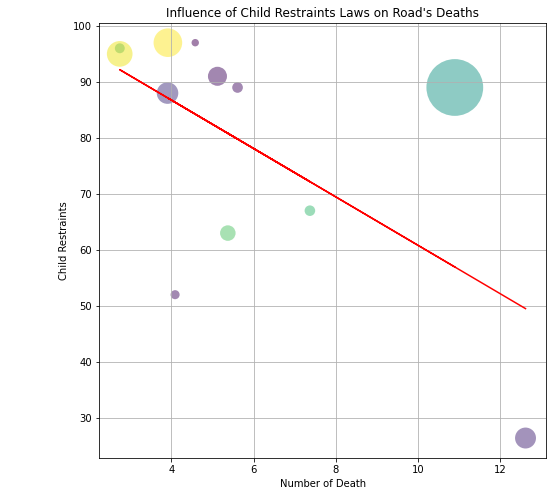

In [22]:
# Plot child restraints versus number of deaths on a scatterplot
colors = np.random.rand(12)
plt.figure(figsize=(8,8))

n = 12
x_values=child_restraints["number of deaths"]/child_restraints["population"]*100000
y_values=child_restraints["percentage child restraints"]

scale = child_restraints["population"]/100000
plt.scatter(x_values, y_values, c=colors,s=scale,alpha=0.5, edgecolors='none')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0.006,50),fontsize=15,color="red")

# Give our chart some labels and a tile 
plt.title("Influence of Child Restraints Laws on Road's Deaths")
plt.xlabel("Number of Death")
plt.ylabel("Child Restraints")

print(f"The r-squared is: {rvalue**2}")
# plt.savefig("../Images/Child Restraints Laws.png")
plt.grid(True)
plt.show()

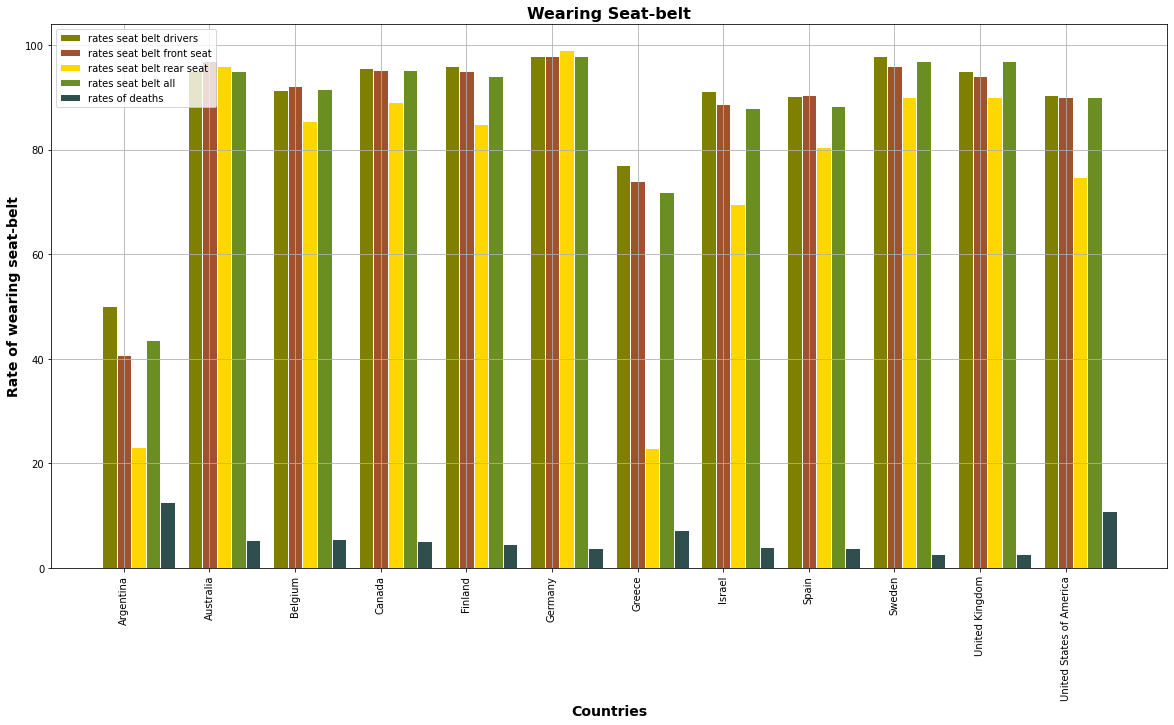

In [23]:
# set width of bar and size of plot
barWidth = 0.17
plt.figure(figsize=(20,10))

# set height of bar
bars1 = selected_df["rates seat belt drivers"]
bars2 = selected_df["rates seat belt front seat"]
bars3 = selected_df["rates seat belt rear seat"]
bars4 = selected_df["rates seat belt all"]
bars5 = child_restraints["number of deaths"]/child_restraints["population"]*100000
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
 
# Make the plot
plt.bar(r1, bars1, color='olive', width=barWidth, edgecolor='white', label='rates seat belt drivers')
plt.bar(r2, bars2, color='sienna', width=barWidth, edgecolor='white', label='rates seat belt front seat')
plt.bar(r3, bars3, color='gold', width=barWidth, edgecolor='white', label='rates seat belt rear seat')
plt.bar(r4, bars4, color='olivedrab', width=barWidth, edgecolor='white', label='rates seat belt all')
plt.bar(r5, bars5, color='darkslategrey', width=barWidth, edgecolor='white', label='rates of deaths')
 
# Give our chart some labels and a tile 
plt.title('Wearing Seat-belt', fontsize='16', fontweight='bold')
plt.xlabel('Countries', fontsize='14', fontweight='bold')
plt.ylabel('Rate of wearing seat-belt',fontsize='14', fontweight='bold')

# Add xticks on the middle of the group bars
plt.xticks([r + barWidth for r in range(len(bars1))], selected_df["country"], rotation=90)

# Create legend & Show graphic
plt.grid()
plt.legend(loc="best")
# plt.savefig("../Images/Wearing Seat-belt.png")
plt.show()
